# Restart after installing h5py

In [ ]:
! pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 8.5 MB/s 
     |████████████████████████████████| 15.7 MB 21.1 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.

In [ ]:
!pip install -U scikit-image==0.16.2

     |████████████████████████████████| 26.5 MB 72.9 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Run the code installing keras below twice, it will be installed 2.1.0 **on the secone time only**


In [ ]:
!pip install -U keras==2.1.0

  Using cached Keras-2.1.0-py2.py3-none-any.whl (302 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd
import skimage.io
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
import tensorflow
import skimage
print(tensorflow.__version__,  skimage.__version__)
import keras
keras.__version__


1.15.2 0.16.2


Using TensorFlow backend.


'2.1.0'

# New section

# The developed code is working with TF 1.15.2, Skimage 0.16.2 and Keras 2.1.0. Check them carefully

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Mapping to your location in google drive

import os
os.chdir("/content/drive/MyDrive/1_ImplantProject/")
!pwd

/content/drive/MyDrive/1_ImplantProject


In [ ]:
#Import after mapping the directory to get the mrcnn folder
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
%matplotlib inline 

In [ ]:
# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

print(ROOT_DIR)

/content/drive/MyDrive/1_ImplantProject


In [ ]:
# Training dataset
testing_dataset = "./dataset_maskrcnn/test")


# Testing Model

In [ ]:
!ls /content/drive/MyDrive/1_ImplantProject/dataset_maskrcnn/15.05/

mask_rcnn_implant_0001.h5  mask_rcnn_implant_0002.h5


In [ ]:
#Change model dir to saved dir
MODEL_DIR = '/content/drive/MyDrive/1_ImplantProject/dataset_maskrcnn/15.05/'

In [ ]:
class ImplantConfig(Config):
    """Configuration for training on the dataset.
    Derives from the base Config class and overrides values specific
    to the dataset.
    """
    # Give the configuration a recognizable name
    NAME = "implant"

    # Train on 1 GPU and 1 images per GPU. We can put multiple images on each
    # GPU. Batch size is (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # background + 3 types of implants

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 896
    IMAGE_MAX_DIM = 896

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 64, 128, 256)  # anchor side in pixels

    # Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 500

    # set number of epoch
    STEPS_PER_EPOCH = 200

    # set validation steps 
    VALIDATION_STEPS = 50

    # Skip detections with < 70% confidence
    #DETECTION_MIN_CONFIDENCE = 0.7

In [ ]:
class InferenceConfig(ImplantConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
test_model = modellib.MaskRCNN(mode="inference",config=inference_config, model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(MODEL_DIR, "mask_rcnn_implant_0002.h5")

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
test_model.load_weights(model_path, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/1_ImplantProject/dataset_maskrcnn/15.05/mask_rcnn_implant_0002.h5








In [ ]:
# IMPLANT Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'bego', 'bicon', 'straumann']

In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/implant
!mkdir /content/images/
!cp /content/drive/MyDrive/Colab\ Notebooks/implant/* /content/images/

bego61.jpg   bicon52.jpg  bicon64.jpg  straumann71.jpg	straumann78.jpg
bego62.jpg   bicon53.jpg  bicon65.jpg  straumann72.jpg	straumann79.jpg
bego63.jpg   bicon54.jpg  bicon66.jpg  straumann73.jpg	straumann80.jpg
bego64.jpg   bicon55.jpg  bicon67.jpg  straumann74.jpg
bego65.jpg   bicon61.jpg  bicon68.jpg  straumann75.jpg
bego66.jpg   bicon62.jpg  bicon69.jpg  straumann76.jpg
bicon51.jpg  bicon63.jpg  bicon70.JPG  straumann77.jpg


 image source: /content/images/bego61.jpg
Processing 1 images
image                    shape: (476, 620, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (476, 620, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (3, 4)                min:   97.00000  max:  446.00000  int32
ROIS:  [[270 214 411 320]
 [268  97 421 231]
 [269 103 446 193]]
MASKS:                   shape: (476, 620, 3)         min:    0.00000  max:    1.00000  bool
Class IDs                shape: (3,)                  min:    2.00000  max:    3.00000  int32
Class IDs [2 3 2]
Scores:  [0.82258373 0.8214406  0.77607006]


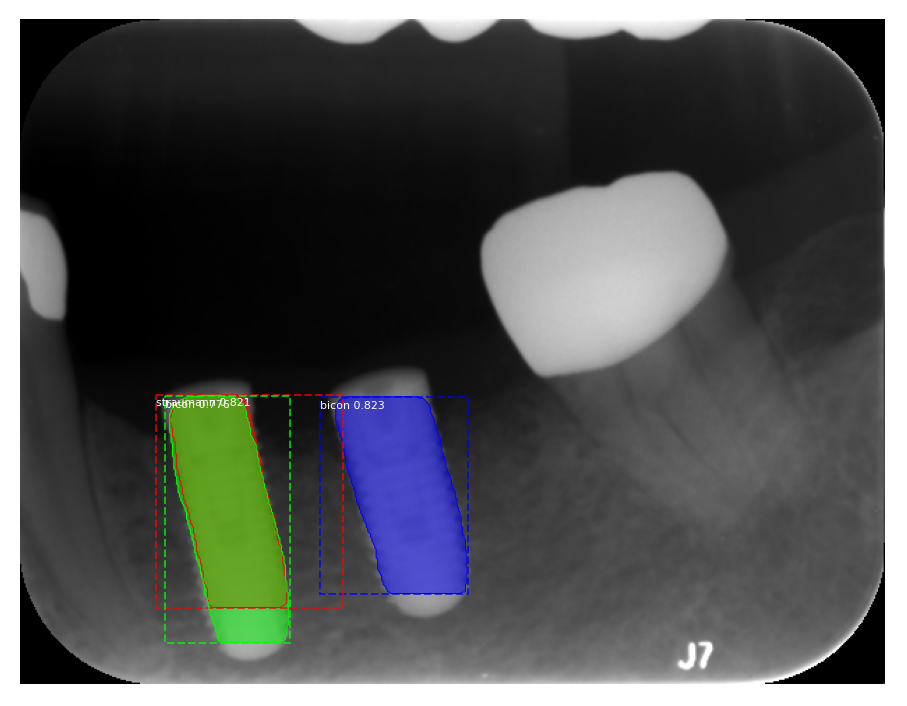

 image source: /content/images/bego62.jpg
Processing 1 images
image                    shape: (474, 632, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (474, 632, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (1, 4)                min:  131.00000  max:  625.00000  int32
ROIS:  [[131 522 409 625]]
MASKS:                   shape: (474, 632, 1)         min:    0.00000  max:    1.00000  bool
Class IDs                shape: (1,)                  min:    3.00000  max:    3.00000  int32
Class IDs [3]
Scores:  [0.704566]


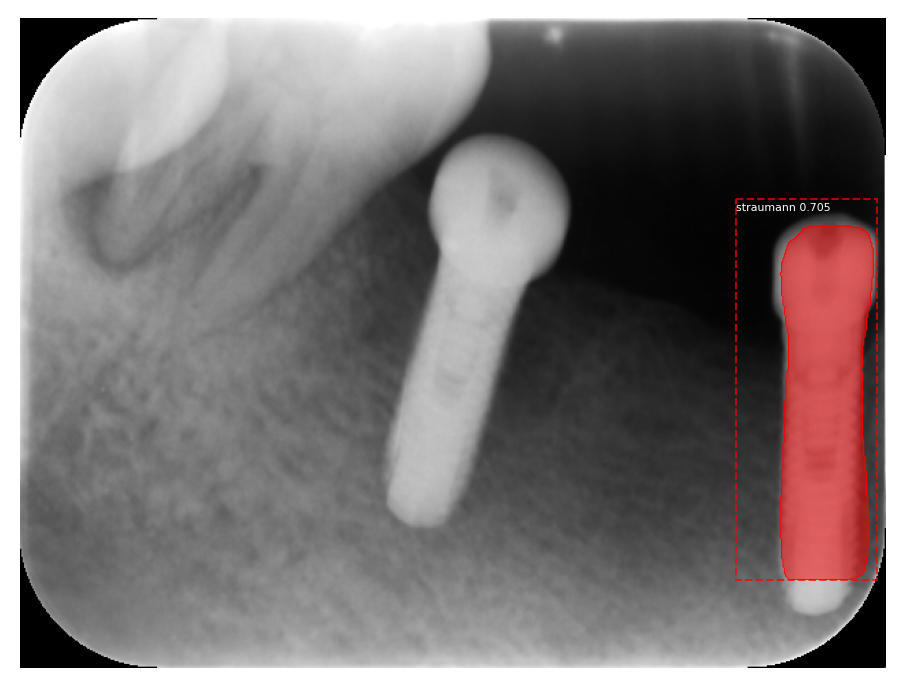

 image source: /content/images/bego63.jpg
Processing 1 images
image                    shape: (476, 624, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (476, 624, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (1, 4)                min:  198.00000  max:  380.00000  int32
ROIS:  [[198 211 380 345]]
MASKS:                   shape: (476, 624, 1)         min:    0.00000  max:    1.00000  bool
Class IDs                shape: (1,)                  min:    2.00000  max:    2.00000  int32
Class IDs [2]
Scores:  [0.7177258]


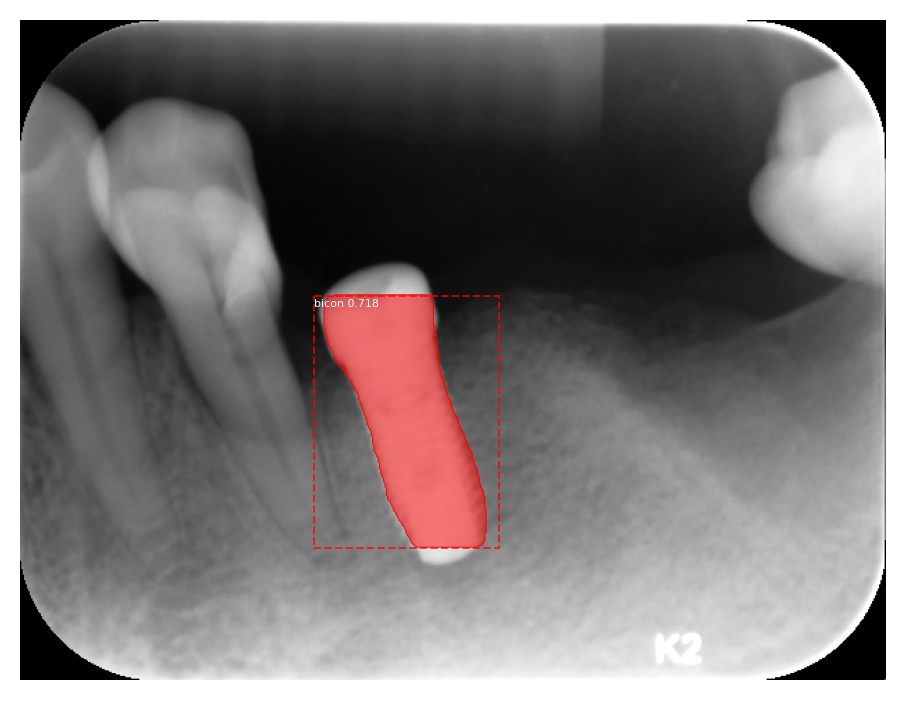

 image source: /content/images/bego64.jpg
Processing 1 images
image                    shape: (476, 612, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (476, 612, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (1, 4)                min:  154.00000  max:  464.00000  int32
ROIS:  [[154 328 358 464]]
MASKS:                   shape: (476, 612, 1)         min:    0.00000  max:    1.00000  bool
Class IDs                shape: (1,)                  min:    2.00000  max:    2.00000  int32
Class IDs [2]
Scores:  [0.788932]


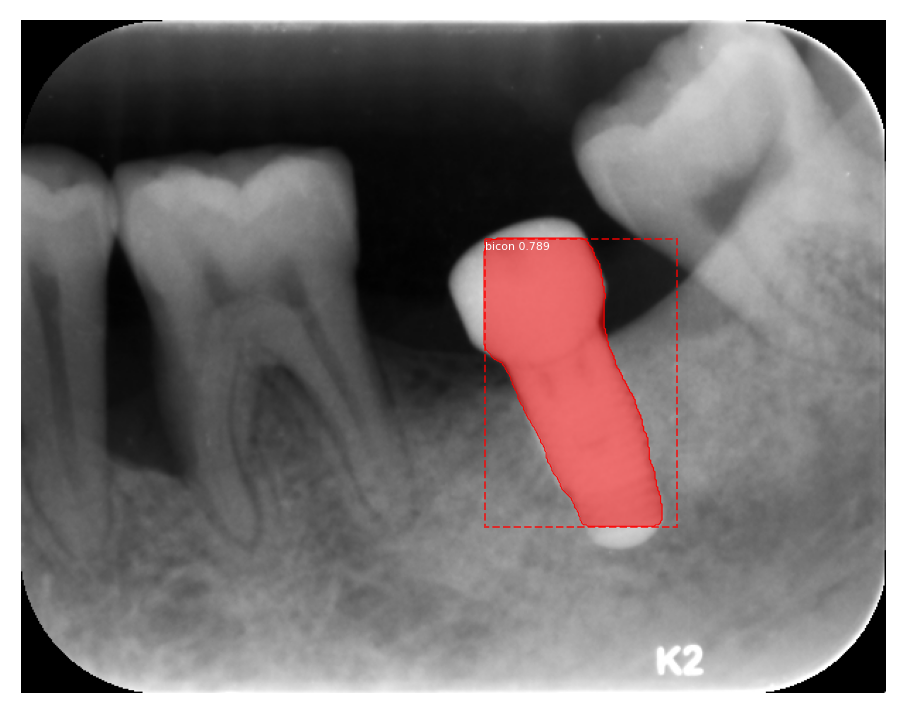

 image source: /content/images/bicon62.jpg
Processing 1 images
image                    shape: (474, 624, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (474, 624, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (1, 4)                min:  261.00000  max:  351.00000  int32
ROIS:  [[277 261 351 349]]
MASKS:                   shape: (474, 624, 1)         min:    0.00000  max:    1.00000  bool
Class IDs                shape: (1,)                  min:    2.00000  max:    2.00000  int32
Class IDs [2]
Scores:  [0.8116378]


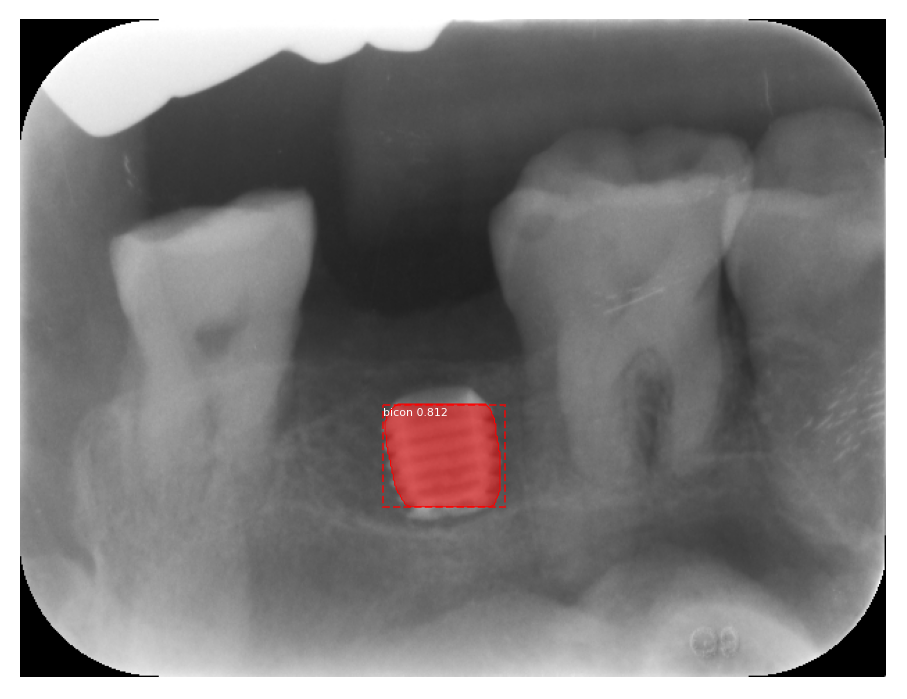

 image source: /content/images/bicon63.jpg
Processing 1 images
image                    shape: (478, 624, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (478, 624, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (0, 4)                min:             max:             int32
ROIS:  []
MASKS:                   shape: (478, 624, 0)         min:             max:             float64
Class IDs                shape: (0,)                  min:             max:             int32
Class IDs []
Scores:  []

*** No instances to display *** 



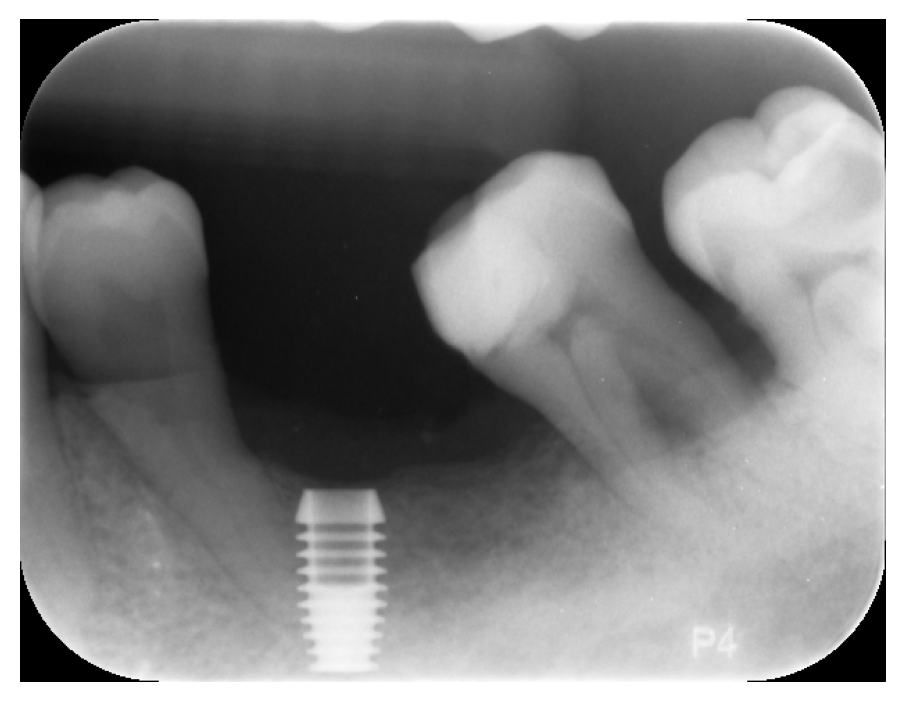

 image source: /content/images/bicon63.jpg
Processing 1 images
image                    shape: (478, 624, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (478, 624, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (0, 4)                min:             max:             int32
ROIS:  []
MASKS:                   shape: (478, 624, 0)         min:             max:             float64
Class IDs                shape: (0,)                  min:             max:             int32
Class IDs []
Scores:  []

*** No instances to display *** 



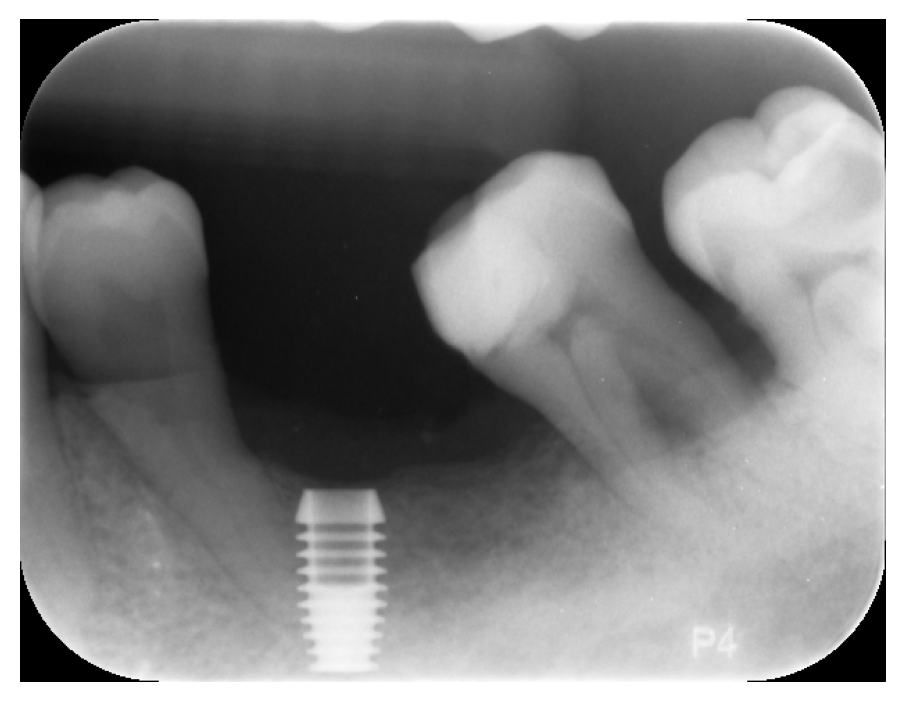

 image source: /content/images/bicon64.jpg
Processing 1 images
image                    shape: (476, 624, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32

 ----
 Image:           shape: (476, 624, 3)         min:    0.00000  max:  255.00000  uint8
ROIS:                    shape: (1, 4)                min:  176.00000  max:  398.00000  int32
ROIS:  [[176 292 344 398]]
MASKS:                   shape: (476, 624, 1)         min:    0.00000  max:    1.00000  bool
Class IDs                shape: (1,)                  min:    2.00000  max:    2.00000  int32
Class IDs [2]
Scores:  [0.9587963]


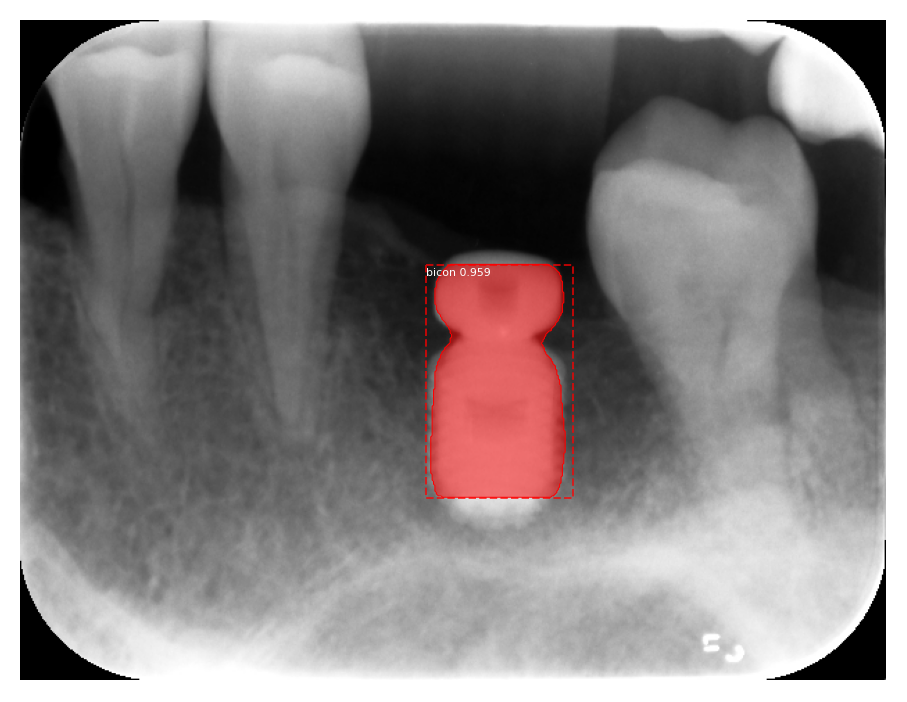

 image source: /content/images/straumann71.jpg
Processing 1 images
image                    shape: (476, 636, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 896, 896, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  896.00000  float64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32


In [ ]:
# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]
choosed_file = ["/content/images/bego61.jpg","/content/images/bego62.jpg", "/content/images/bego63.jpg","/content/images/bego64.jpg",
                "/content/images/bicon62.jpg","/content/images/bicon63.jpg","/content/images/bicon63.jpg","/content/images/bicon64.jpg",
                "/content/images/straumann71.jpg", "/content/images/straumann72.jpg","/content/images/straumann73.jpg","/content/images/straumann74.jpg", ]

for item in choosed_file:
  image = skimage.io.imread(item )
  print(" image source:", item)

  # Run detection
  results = None
  results = test_model.detect([image], verbose=1)

  # Visualize results
  r = results[0]
  log("\n ----\n Image: ", image)
  log("ROIS: ", r['rois'])
  print("ROIS: ",r['rois'])
  log("MASKS: ", r['masks'])
  #print("Masks value:", r['masks'])
  log("Class IDs", r['class_ids'])
  print("Class IDs", r['class_ids'])
  print("Scores: ", r['scores'])

  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              class_names, r['scores'])


In [ ]:
choosed_file = "/content/images/bicon62.jpg"
image = skimage.io.imread(choosed_file )
# Run detection
results = test_model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                             dataset_train.class_names, r['scores'])

# Code below for optimization the brightness and constrast of images


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=10):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)

def contrast_image(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    final_img = clahe.apply(image_bw)
    #_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
    return final_img
    

In [ ]:
import os
dir_path = './train'
new_dir_path = dir_path + '_mode'
text_files = [f for f in os.listdir(dir_path) if f.endswith('.jpg')]

for f in text_files:
    file_path = dir_path + '/' + f 
    print(file_path)
    rf = cv2.imread(file_path)
    auto_result, alpha, beta = automatic_brightness_and_contrast(rf)
    print(new_dir_path + '/' + f, auto_result)
    cv2.imwrite(new_dir_path + '/' + f, auto_result)

In [ ]:
dir_path = './val'
new_dir_path = dir_path + '_mode'
text_files = [f for f in os.listdir(dir_path) if f.endswith('.jpg')]

for f in text_files:
    file_path = dir_path + '/' + f 
    print(file_path)
    rf = cv2.imread(file_path)
    auto_result, alpha, beta = automatic_brightness_and_contrast(rf)
    print(new_dir_path + '/' + f, auto_result)
    cv2.imwrite(new_dir_path + '/' + f, auto_result)

# CODE BELOW FOR LOADING THE MASK THEN SAVE AS MASK IMAGE WHICH WILL BE USED FOR UNET

In [ ]:
#Create the function to convert the annotations to masked file
import os

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

# Source_path : folder of original file
# file: file name in orginal folder
# save_path: folder of save files
# x_pos = array of X 
# y_pos = array of Y
# second : this will be used for multiple masks in one images. Second = false for first running
# second = True for remaining masks
def convertAnnotationToMask(source_path, file, save_path, x_pos, y_pos, second):
    file_name = os.path.join(source_path, file)
    print("Source file", file_name)
    img = cv2.imread(file_name)
    x = x_pos
    y = y_pos

    area = np.zeros((0,2), dtype=int)
    i = 0
    while i < len(x):
        test = np.array([x[i], y[i]])
        area = np.insert(area, i, test, 0)
        i += 1

    filled = img
    #1st running will load the original image, next time will reuse the previous step's result
    if (second == False):
      filled = np.zeros_like(img)

    filled = cv2.fillPoly(filled, pts = [area], color =(255,255,255))
    save_file = os.path.join(save_path, file)
    print("Save file",save_file)
    cv2.imwrite(save_file,filled)

In [ ]:
#Run with all data set train and test
image_ids = dataset_train.image_ids
for image_id in image_ids:
  image = dataset_train.load_info(image_id)
  print(len(image['polygons']))
  i = 0 
  while i < len(image['polygons']):
    x = image['polygons'][i]['all_points_x']
    y = image['polygons'][i]['all_points_y']
    if (i == 0):
      convertAnnotationToMask("/content/dataset/train/train", image['id'],  "/content/dataset/train_mask", x, y, False)
    else:
      convertAnnotationToMask("/content/dataset/train_mask", image['id'],  "/content/dataset/train_mask", x, y, True)
    i += 1

image_ids = dataset_val.image_ids
for image_id in image_ids:
  image = dataset_val.load_info(image_id)
  print(len(image['polygons']))
  i = 0 
  while i < len(image['polygons']):
    x = image['polygons'][i]['all_points_x']
    y = image['polygons'][i]['all_points_y']
    if (i == 0):
      convertAnnotationToMask("/content/dataset/val/val", image['id'], "/content/dataset/val_mask", x, y, False)
    else:
      convertAnnotationToMask("/content/dataset/val_mask", image['id'], "/content/dataset/val_mask", x, y, True)
    i += 1